In [1]:
import pandas as pd
import numpy as np
import arviz as az
import pymc3 as pm
import scipy.stats as st
import seaborn as sns

# Multiple players

In [2]:
# (hits, at_bats)
players = np.array([[10, 100], [1, 50], [10, 10], [100,100]])
SHAPE = players.shape[0]

In [4]:
with pm.Model() as m:
    
    hit_rate = pm.Beta('hit_rate', alpha = 1, beta = 1, shape = SHAPE)
    hits = pm.Binomial('hits', n=players[:,1], p = hit_rate, observed = players[:,0], shape = SHAPE)

In [5]:
# check priors
with m:
    prior = pm.sample_prior_predictive(samples=1000)

C:\anaconda\envs\py37\lib\site-packages\arviz\data\base.py:145: SyntaxWarning: More chains (1000) than draws (4). Passed array should have shape (chains, draws, *shape)
  SyntaxWarning,
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"


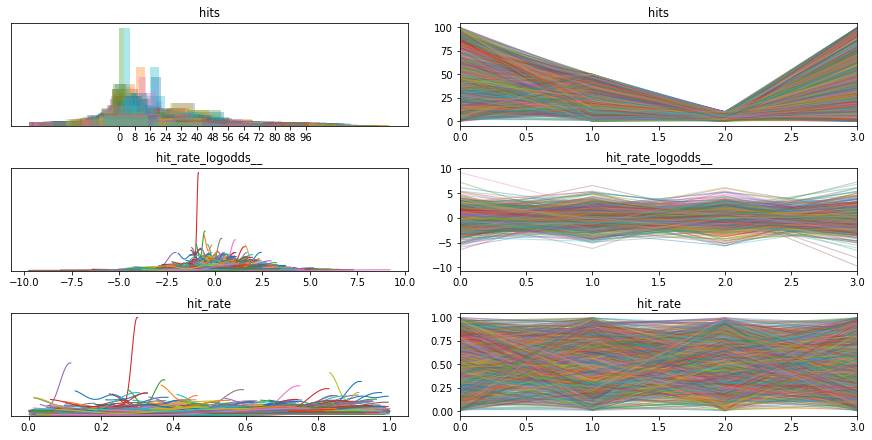

In [6]:
# display priors on hit rate
pm.traceplot(prior);

In [7]:
# MC sampling
with m:
    trace = pm.sample(chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [hit_rate]
Sampling 4 chains: 100%|███████████████████████████████████████| 4000/4000 [00:07<00:00, 501.19draws/s]


C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has not effect in matplotlib.plot_dist"
C:\anaconda\envs\py37\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:38: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  "Argument backend_kwargs has 

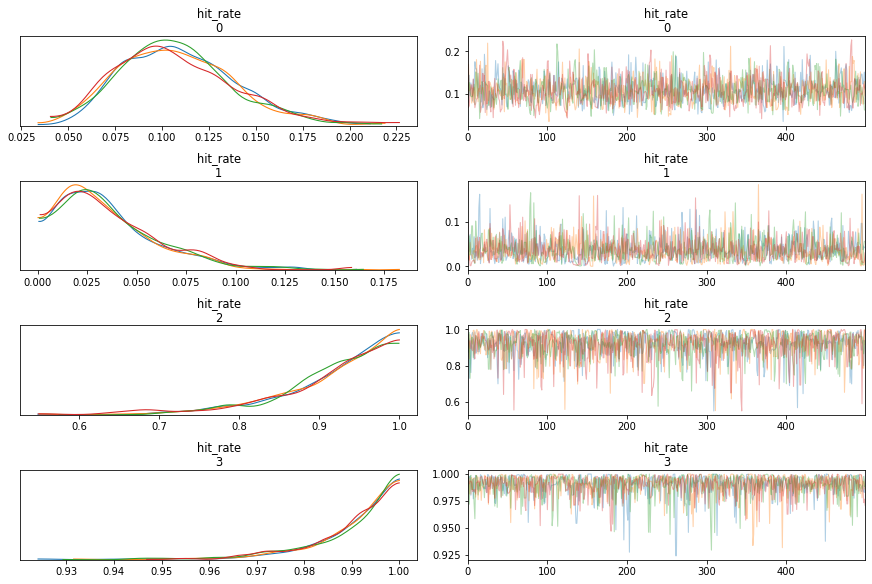

In [8]:
# display posterior on hit rate
pm.traceplot(trace);

In [9]:
# 90% credible interval for parameter
pm.summary(trace, alpha = .05)

C:\anaconda\envs\py37\lib\site-packages\pymc3\stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
hit_rate__0,0.108142,0.030912,0.000813,0.048380,0.167300,1510.512975,0.999904
hit_rate__1,0.036674,0.026051,0.000668,0.000395,0.085499,1898.254704,1.000203
hit_rate__2,0.916186,0.074358,0.001640,0.765871,0.999876,1917.953968,1.000640
hit_rate__3,0.989963,0.010402,0.000225,0.970239,0.999991,1974.113304,0.999358


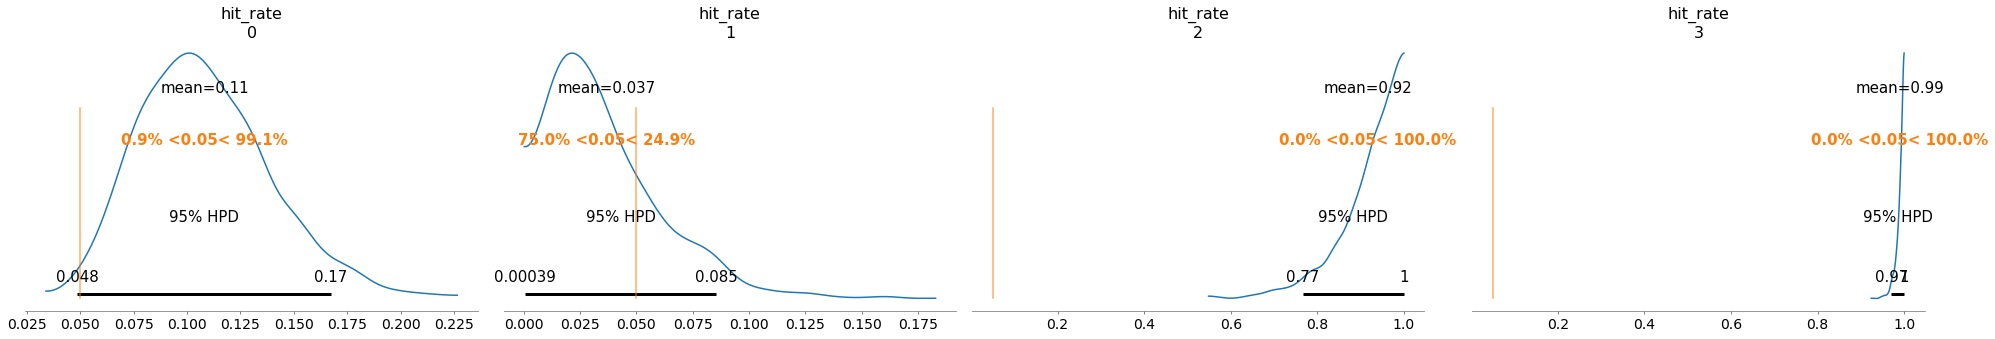

In [11]:
# probability that true hit rate is above/below 5% and credible interval
pm.plot_posterior(trace, ref_val=.05, credible_interval=0.95);

In [33]:
data = pm.trace_to_dataframe(trace)
data.head()

,hit_rate__0,hit_rate__1,hit_rate__2,hit_rate__3
0,0.125080,0.013395,0.848763,0.982132
1,0.079314,0.031033,0.973950,0.995020
2,0.143167,0.033938,0.729228,0.997173
3,0.095022,0.071447,0.947942,0.997927
4,0.125111,0.040444,0.761214,0.980311
